### Objective
<p>Recreate [this viz](https://twitter.com/datarink/status/819265252747603969), for both Corsi and goals

### Setup

In [1]:
import PbPMethods2 as pm2
from pylab import *
%matplotlib inline
import seaborn
import pandas as pd

### Pull the data

In [2]:
GENDATA = False
filename = './cd by game.csv'
if GENDATA:
    season = 2016
    teamcd = {}
    teamgd = {}
    teamgame = {}
    w = open(filename, 'w')
    w.write('Season,Team,Game,CD,GD')
    for team in pm2.get_teams(season):
        teamcd[team] = [0 for i in range(82)]
        teamgd[team] = [0 for i in range(82)]
        teamgame[team] = []
        for line in pm2.read_team_corsi(team, season):
            g = pm2.get_game(line)
            if len(teamgame[team]) == 0 or teamgame[team][-1] != g:
                teamgame[team].append(g)
            i = len(teamgame[team]) - 1
            if pm2.get_acting_team(line) == team:
                teamcd[team][i] += 1
                if pm2.get_event_type(line) == 'GOAL':
                    teamgd[team][i] += 1
            else:
                teamcd[team][i] -= 1
                if pm2.get_event_type(line) == 'GOAL':
                    teamgd[team][i] -= 1
        for i in range(len(teamgame[team])):
            w.write('\n{0:d},{1:s},{2:d},{3:d},{4:d}'.format(season, team, teamgame[team][i],
                                                            teamcd[team][i], teamgd[team][i]))
    w.close()
df = pd.read_csv(filename)
df.head()

,Season,Team,Game,CD,GD
0,2016,BOS,20008,-1,4
1,2016,BOS,20017,9,-4
2,2016,BOS,20036,1,2
3,2016,BOS,20051,9,2
4,2016,BOS,20065,0,-2


In [3]:
teamlst = df.Team
df2 = df[['Team', 'Game', 'CD', 'GD']].groupby('Team').cumsum()
df2['Team'] = teamlst
df2.head()

,CD,GD,Game,Team
0,-1,4,20008,BOS
1,8,0,40025,BOS
2,9,2,60061,BOS
3,18,4,80112,BOS
4,18,2,100177,BOS


### Create CD chart

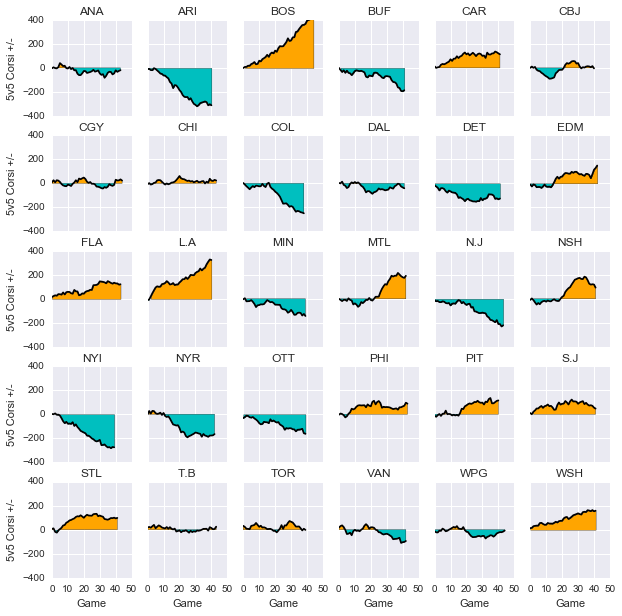

In [4]:
fig, axes = subplots(5, 6, sharex=True, sharey=True, figsize=[10, 10])
teams = df2['Team'].unique()
teams.sort()
for i in range(len(teams)):
    row = int(i/6)
    col = i % 6
    ax = axes[row, col]
    ax.set_title(teams[i])
    if row == 4:
        ax.set_xlabel('Game')
        ax.set_xlim(0, 50)
        ax.set_xticks([0, 10, 20, 30, 40, 50])
    if col == 0:
        ax.set_ylabel('5v5 Corsi +/-')
        ax.set_ylim(-400, 400)
        ax.set_yticks([-400, -200, 0, 200, 400])
    
    temp = df2[df2.Team == teams[i]]
    temp.reset_index(inplace=True)
    temp.Zero = 0
    ax.plot(temp.index, temp.CD, color='k')
    ax.fill_between(temp.index, temp.CD, temp.Zero, where = temp.CD > temp.Zero, facecolor='orange')
    ax.fill_between(temp.index, temp.CD, temp.Zero, where = temp.CD < temp.Zero, facecolor='c')

### Create GD chart

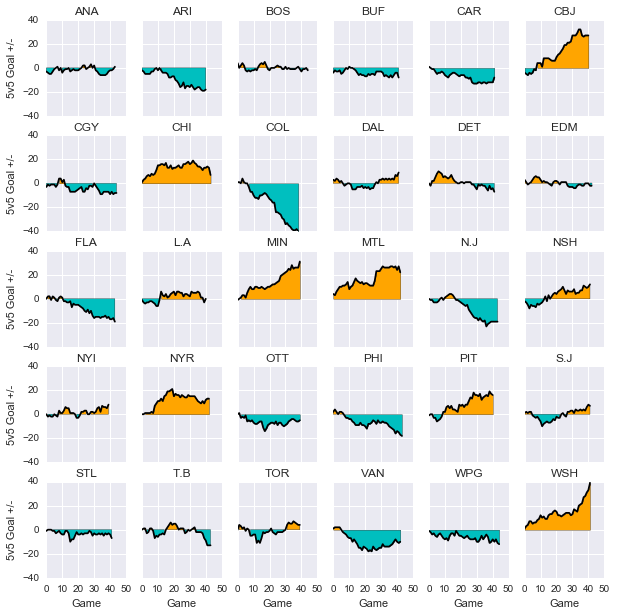

In [5]:
fig, axes = subplots(5, 6, sharex=True, sharey=True, figsize=[10, 10])
teams = df2['Team'].unique()
teams.sort()
for i in range(len(teams)):
    row = int(i/6)
    col = i % 6
    ax = axes[row, col]
    ax.set_title(teams[i])
    if row == 4:
        ax.set_xlabel('Game')
        ax.set_xlim(0, 50)
        ax.set_xticks([0, 10, 20, 30, 40, 50])
    if col == 0:
        ax.set_ylabel('5v5 Goal +/-')
        ax.set_ylim(-40, 40)
        ax.set_yticks([-40, -20, 0, 20, 40])
    
    temp = df2[df2.Team == teams[i]]
    temp.reset_index(inplace=True)
    temp.Zero = 0
    ax.plot(temp.index, temp.GD, color='k')
    ax.fill_between(temp.index, temp.GD, temp.Zero, where = temp.GD > temp.Zero, facecolor='orange')
    ax.fill_between(temp.index, temp.GD, temp.Zero, where = temp.GD < temp.Zero, facecolor='c')